In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from collections import Counter


print("Pandas version: {}".format(pd.__version__))
print("NumPy version: {}".format(np.__version__))

Pandas version: 2.2.3
NumPy version: 2.1.1


In [2]:
data_path = "../literature/tools.tsv"
fig_dir = "./figures"

In [3]:
df = pd.read_csv(data_path, delimiter="\t")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Filename          155 non-null    int64 
 1   Reviewed By       155 non-null    object
 2   Title             155 non-null    object
 3   First Author      155 non-null    object
 4   Year              155 non-null    int64 
 5   Venue             155 non-null    object
 6   Dataset(s)        150 non-null    object
 7   Flow Exporter(s)  99 non-null     object
 8   Unnamed: 8        18 non-null     object
 9   tools             131 non-null    object
dtypes: int64(2), object(8)
memory usage: 12.2+ KB


In [5]:
df_filtered = df.dropna(subset=['tools']).reset_index()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             131 non-null    int64 
 1   Filename          131 non-null    int64 
 2   Reviewed By       131 non-null    object
 3   Title             131 non-null    object
 4   First Author      131 non-null    object
 5   Year              131 non-null    int64 
 6   Venue             131 non-null    object
 7   Dataset(s)        129 non-null    object
 8   Flow Exporter(s)  87 non-null     object
 9   Unnamed: 8        0 non-null      object
 10  tools             131 non-null    object
dtypes: int64(3), object(8)
memory usage: 11.4+ KB


In [6]:
all_tools = [tool for sublist in df_filtered['tools'].str.split(',') for tool in sublist]

/tmp/ipykernel_140090/21287630.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_tool_counts.keys(), rotation=65, ha='center')


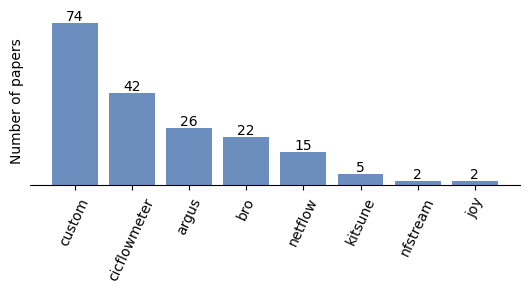

In [7]:
tool_counts = Counter(all_tools)
filtered_tool_counts = {tool: count for tool, count in tool_counts.items() if count > 1}
sorted_tool_counts = dict(sorted(filtered_tool_counts.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(5.4, 3))
# ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

bars = ax.bar(sorted_tool_counts.keys(), sorted_tool_counts.values(), color="#6C8EBF")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

ax.set_ylabel('Number of papers')
ax.set_yticks([])
ax.set_xticklabels(sorted_tool_counts.keys(), rotation=65, ha='center')
plt.tight_layout()
plt.savefig(f'{fig_dir}/tool_count.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_140090/1166881819.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sorted_tool_counts.keys())


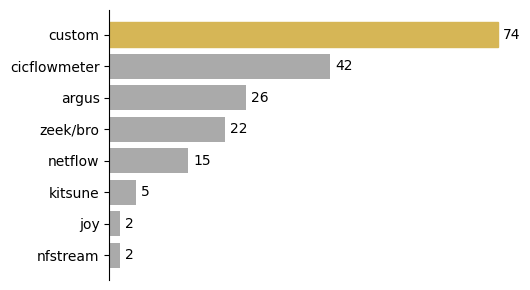

In [12]:
tool_counts = Counter(all_tools)
tool_counts["zeek/bro"] = tool_counts.pop("bro")
filtered_tool_counts = {tool: count for tool, count in tool_counts.items() if count > 1}
sorted_tool_counts = dict(sorted(filtered_tool_counts.items(), key=lambda item: item[1], reverse=False))

fig, ax = plt.subplots(figsize=(5.4, 3))
# ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

bars = ax.barh(sorted_tool_counts.keys(), sorted_tool_counts.values(), color="#AAAAAA")
bars[-1].set_color("#D6B656")

for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 1, bar.get_y() + bar.get_height()/2, int(yval), va='center', ha='left')

# ax.set_xlabel('Number of papers')
ax.set_xticks([])
ax.set_yticklabels(sorted_tool_counts.keys())
plt.tight_layout()
plt.savefig(f'{fig_dir}/tool_count_vertical_grey_yellow.pdf', bbox_inches='tight')
plt.show()